In [21]:
def node_info(df, node):
    #print(f'Node: {node}')
    co = df.loc[:, node]['CO']
    no2 = df.loc[:, node]['NO2']
    pm10 = df.loc[:, node]['PM10']
    pm25 = df.loc[:, node]['PM25']
    so2 = df.loc[:, node]['SO2']

    co_nans = co.isna().sum()
    no2_nans = no2.isna().sum()
    pm10_nans = pm10.isna().sum()
    pm25_nans = pm25.isna().sum()
    so2_nans = so2.isna().sum()

    co_perc = round((co_nans/len(co))*100, 2)
    no2_perc = round((no2_nans/len(no2))*100, 2)
    pm10_perc = round((pm10_nans/len(pm10))*100, 2)
    pm25_perc = round((pm25_nans/len(pm25))*100, 2)
    so2_perc = round((so2_nans/len(so2))*100, 2)

    features = [co_perc, no2_perc,  pm10_perc, pm25_perc, so2_perc]

    # print(f'CO NaNs: \t{co_nans}\t({co_perc}% of total for this node)')
    # print(f'NO2 NaNs: \t{no2_nans}\t({no2_perc}% of total for this node)')
    # print(f'PM10 NaNs: \t{pm10_nans}\t({pm10_perc}% of total for this node)')
    # print(f'PM25 NaNs: \t{pm25_nans}\t({pm25_perc}% of total for this node)')
    # print(f'SO2 NaNs: \t{so2_nans}\t({so2_perc}% of total for this node)')
    # print()

    return features


In [22]:
import pandas as pd

In [23]:
new_final = pd.read_pickle('../data/analysis1.pkl')

### Analisys of NaNs values per node (all features)

First we get all the unique values for the nodes:

In [24]:
unique_nodes = new_final.columns.get_level_values(0).drop_duplicates()

In [25]:
len(unique_nodes)

1326

In [26]:
dict = {}
kept_nodes = []

In [27]:
def keep_node(features):
    if features[3] < 90:
        return True
    else:
        return False


For each node, we calculate the percent of NaN values for the different pollutants. <br>
Note that we only keep the nodes which have a percent of PM2.5 NaNs values < 90 %

In [28]:
for node in unique_nodes:
    dict[node] = node_info(new_final, node)
    keep = keep_node(dict[node])

    if keep:
        kept_nodes.append(node)


In [29]:
len(kept_nodes)

665

In [30]:
import matplotlib.pyplot as plt

We plot the first 15 out of our 665 kept nodes to show that for nodes with an acceptable percent of PM2.5, the other pollutants are mostly 100% NaN

In [31]:
def get_nans_perc(kept, slice_at=None):

    nans_perc = [
                 [], # CO
                 [], # NO2
                 [], # PM10
                 [], # PM25
                 []  # SO2
                ]

    if slice_at is not None:
        kept = kept[:slice_at]

    for i in range(len(kept)):
        node = kept[i]
        nans_perc[0].append(dict[node][0])
        nans_perc[1].append(dict[node][1])
        nans_perc[2].append(dict[node][2])
        nans_perc[3].append(dict[node][3])
        nans_perc[4].append(dict[node][4])

    return nans_perc

    

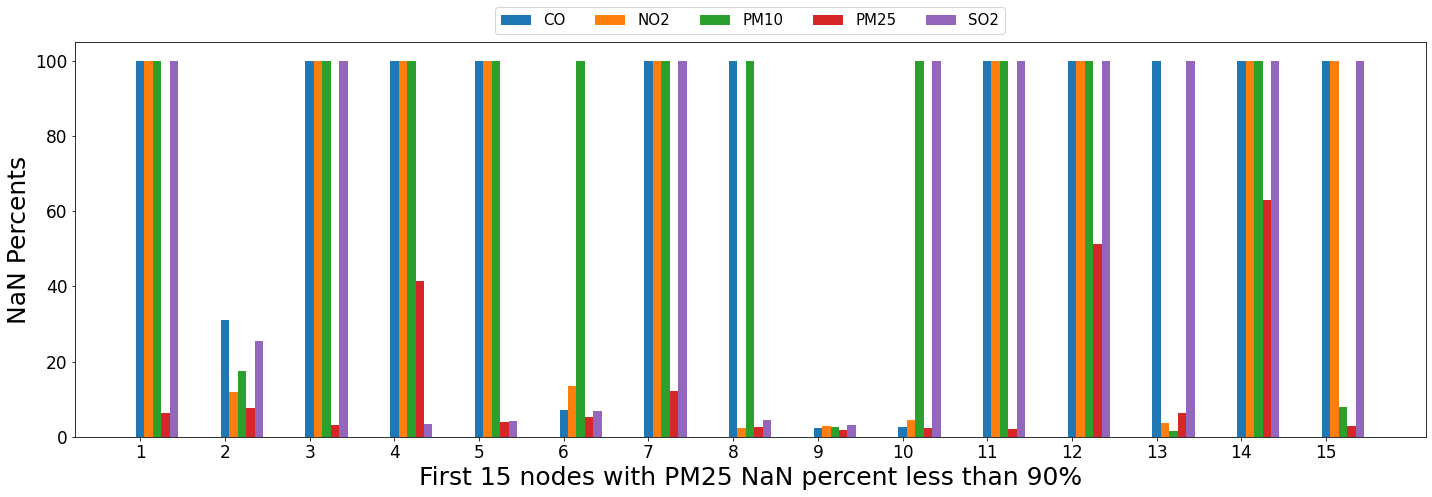

In [32]:
import matplotlib.pyplot as plt
import numpy as np

num = 15

labels = np.arange(1, num+1)

x = np.arange(len(labels))  # the label locations

width = 0.1  # the width of the bars

nans_perc = get_nans_perc(kept_nodes, slice_at = num)

r1 = np.arange(len(nans_perc[0]))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

fig, ax = plt.subplots(figsize=(20, 7))
rects1 = ax.bar(r1, nans_perc[0], width, label='CO')
rects2 = ax.bar(r2, nans_perc[1], width, label='NO2')
rects3 = ax.bar(r3, nans_perc[2], width, label='PM10')
rects4 = ax.bar(r4, nans_perc[3], width, label='PM25')
rects5 = ax.bar(r5, nans_perc[4], width, label='SO2')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NaN Percents', size = 25)
ax.set_xlabel('First 15 nodes with PM25 NaN percent less than 90%', size = 25)
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels, size=17)

plt.yticks(fontsize=17)

ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", borderaxespad=0, ncol=5, fontsize=15)

fig.tight_layout()

plt.show()

For the reason explained above we decide to keep only PM2.5 as pollutant for our data and subsequent training

Now we plot the distribution of the percent of NaNs only in PM2.5 pollutant for the kept nodes

In [33]:
pm25_perc_all = get_nans_perc(kept_nodes)[3]

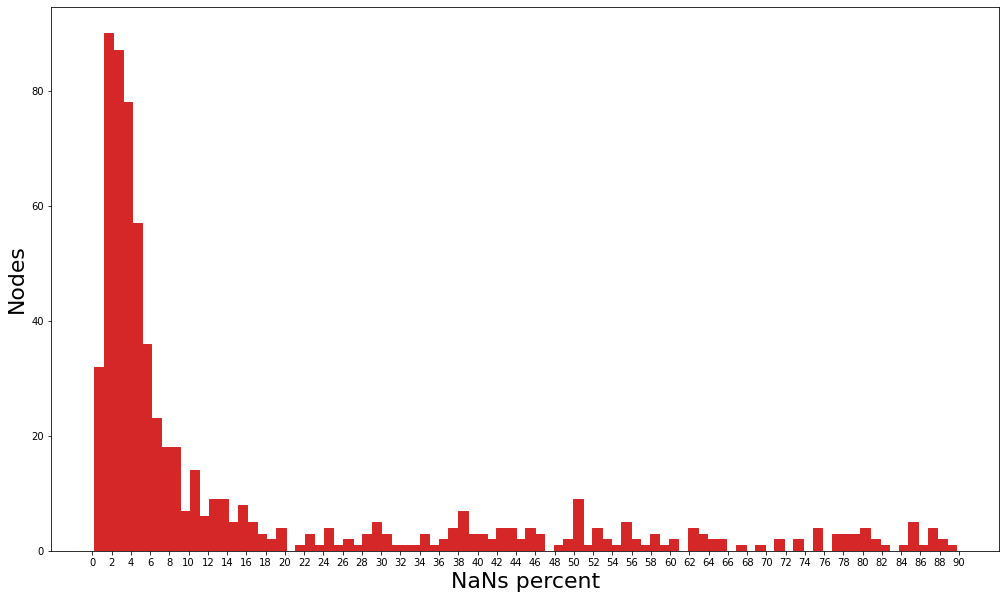

In [34]:

binwidth = 2
fig, ax = plt.subplots(figsize=(17, 10))

ax.hist(pm25_perc_all, bins = int(180/binwidth),
             color = 'tab:red', edgecolor = 'tab:red')
    
# Title and labels
ax.set_xlabel('NaNs percent', size = 22)
ax.set_ylabel('Nodes', size= 22)

ax.set_xticks(np.arange(0, 91, binwidth));

We also analyse the distribution of the non-NaNs values of the PM2.5 in the entire dataset: 

In [35]:
pm25_df = new_final.copy()

pm25_df.drop(['CO', 'NO2', 'PM10', 'SO2'], axis=1, level=1, inplace=True)

In [36]:
pm25_df = pm25_df.loc[:, kept_nodes]

In [37]:
pm25_df.shape

(17526, 665)

In [38]:
pm25_all_vals = pm25_df.values.flatten()

In [39]:
nan_array = np.isnan(pm25_all_vals)
not_nan_array = ~ nan_array
pm25_not_nans = pm25_all_vals[not_nan_array]

In [40]:
print(min(pm25_not_nans))
print(max(pm25_not_nans))

-73.4
1248.9


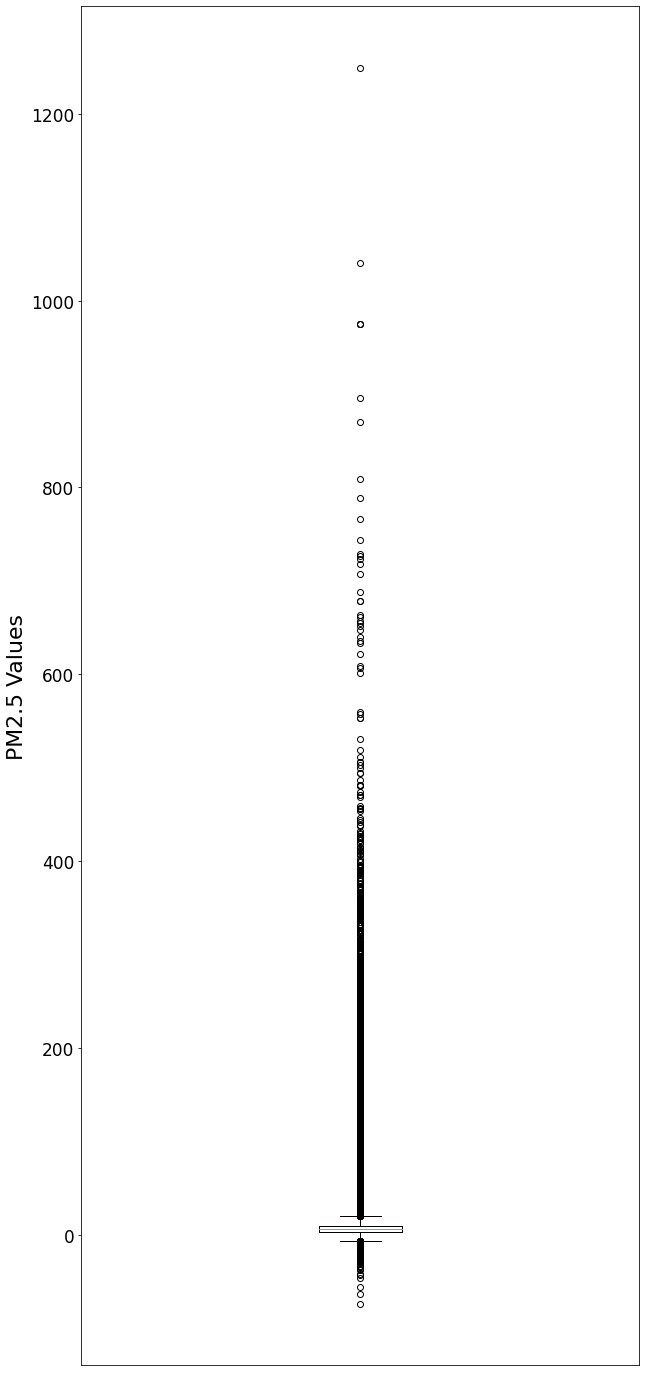

In [46]:

binwidth = 1
fig, ax = plt.subplots(figsize=(10, 25))

ax.boxplot(pm25_not_nans)
    
# Title and labels
ax.set_ylabel('PM2.5 Values', size= 22)
plt.yticks(fontsize = 17)

ax.set_xticks([]);

## Loading the dataset class

The class uses a slight different dataset than the one used in the previous analysis. <br>
We actually decided to add one year more of data (2020) to the dataset.

In [47]:
from airquality import AirQuality
aq = AirQuality(data_dir='../data')


Found temporal data pickle, loading...	DONE!
Found a valid build, loading... 	DONE!


The temporal builder is called when the class AirQuality is initialized. <br>
It creates a pandas multiindex dataframe by selecting the nodes with a percentage of PM2.5 NaNs values < 90%.

In [5]:
tbd = aq.temporal
len(tbd.nodes_to_keep)

695

In [6]:
sites = tbd.dataset

In [7]:
aq.dataset.head()

nodes,1.0-103.0-11.0,1.0-113.0-3.0,1.0-73.0-23.0,10.0-1.0-2.0,10.0-3.0-1007.0,10.0-3.0-1008.0,10.0-3.0-2004.0,10.0-5.0-1002.0,11.0-1.0-41.0,11.0-1.0-43.0,...,80.0-2.0-12.0,80.0-2.0-14.0,9.0-1.0-10.0,9.0-1.0-1123.0,9.0-11.0-124.0,9.0-3.0-1003.0,9.0-3.0-25.0,9.0-5.0-5.0,9.0-9.0-2123.0,9.0-9.0-27.0
channels,PM25,PM25,PM25,PM25,PM25,PM25,PM25,PM25,PM25,PM25,...,PM25,PM25,PM25,PM25,PM25,PM25,PM25,PM25,PM25,PM25
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 05:00:00,10.900000,19.142857,11.44,5.4,13.0,10.0,7.2,5.2,10.0,12.0,...,53.166668,116.166664,11.0,9.0,7.0,6.0,8.0,7.0,0.0,3.0
2018-01-01 06:00:00,9.428533,16.000000,13.40,5.2,12.1,12.1,5.6,5.2,14.0,11.0,...,61.833332,137.500000,8.0,9.0,7.0,6.0,10.0,6.0,1.0,3.0
2018-01-01 07:00:00,9.472011,15.000000,21.10,8.0,13.0,12.8,5.1,5.2,11.0,11.0,...,71.500000,141.166672,9.0,5.0,6.0,8.0,7.0,5.0,4.0,3.0
2018-01-01 08:00:00,9.545652,15.000000,17.40,7.7,14.1,12.5,4.8,6.1,16.0,9.0,...,344.000000,622.000000,8.0,3.0,3.0,7.0,3.0,1.0,3.0,1.0
2018-01-01 09:00:00,9.561413,13.000000,5.40,7.6,15.7,7.9,4.2,6.0,8.0,10.0,...,292.000000,744.000000,5.0,4.0,3.0,5.0,3.0,4.0,1.0,0.0


The method <i>get_closest_nodes()</i> is used to get the N closest nodes to a given node. 

In [8]:
print(aq.get_closest_nodes(start_node='1.0-103.0-11.0', n_nodes = 50))

[0, 1, 2, 33, 34, 35, 36, 38, 39, 41, 42, 43, 73, 79, 111, 112, 113, 115, 117, 121, 123, 125, 201, 202, 203, 206, 207, 305, 308, 429, 431, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 453, 454, 455, 456, 457, 458, 459, 460, 461]


In [9]:
def node_info_pm25(df, node):

    pm25 = df.loc[:, node]['PM25']
    pm25_nans = pm25.isna().sum()

    return pm25_nans

In [10]:
nans_df = pd.DataFrame(columns=['node', 'nans_num'])
for i, node in enumerate(sites.columns.get_level_values(0).drop_duplicates()):
    nans_df.loc[i] = [node] + [node_info_pm25(sites,node)]

NameError: name 'pd' is not defined

In [ ]:
from tqdm import tqdm

In [ ]:
result = pd.DataFrame(columns=['start_node', 'nans_sum'])

We search for an optimal size and node to use as parameters to construct the subgraph:

In [ ]:
for size in [50,60,70,80,90,100]:
    for i, node in enumerate(tqdm(sites.columns.get_level_values(0).drop_duplicates(), leave=False)):
        neighbours = aq.get_closest_nodes(node, size)
        sum = 0
        for subnode in neighbours:
            subnode = aq.lookup_id(subnode)
            sum+=(nans_df.loc[nans_df['node'] == subnode])['nans_num'].item()
        result.loc[i] = [node] + [sum]
    #print("\r")
    print('Subgraphs of size '+str(size), end ='')
    min_node = result.loc[:, 'nans_sum'].idxmin()
    min = result.loc[:, 'nans_sum'].min()
    print("\t" + aq.lookup_id(min_node), " " + str((min/(size*17526) * 100)) + "% of nan on total nodes")

Subgraphs of size 50	6.0-83.0-2004.0  10.566815017688008% of nan on total nodes


Subgraphs of size 60	6.0-31.0-4.0  10.399977176765947% of nan on total nodes


Subgraphs of size 70	6.0-79.0-8002.0  10.948549909522178% of nan on total nodes


Subgraphs of size 80	15.0-1.0-1006.0  14.284776902887138% of nan on total nodes


Subgraphs of size 90	6.0-31.0-1004.0  16.503353747448234% of nan on total nodes


Subgraphs of size 100	19.0-103.0-2001.0  17.17145954581764% of nan on total nodes


We choose to use the starting node '6.0-79.0-8002.0' and a size of 70 since this way we can get a good number of valid values together with a good number of nodes.

In [48]:
aq = AirQuality(data_dir='../data', is_subgraph=True, sub_size = 70, sub_start= '6.0-79.0-8002.0')
print(aq)

Found temporal data pickle, loading...	DONE!
Found a valid build, loading... 	DONE!
AQ(length=26309, n_nodes=70, n_channels=1)


Then we check the connectivity on our subgraph and we get the number of non-connected components.

In [51]:
adj = aq.get_connectivity(threshold=0.1,
                               include_self=False,
                               normalize_axis=1,
                               layout="edge_index")

edge_index, edge_weight = adj

In [53]:
adj_expected = 70 ** 2

In [57]:
adj_expected - edge_weight.shape[0]

2584